In [76]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics


In [102]:
data = pd.read_csv('auto.csv')
data.head(60)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,158,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,158,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,192,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,23875


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## 2. Рассчитать основные статистики для переменных(среднее,медиана, мода, мин/макс, сред. отклонение)

In [79]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [80]:
statistics.mean(data['engine-size'])

126.90731707317073

In [81]:
enginesize = data['engine-size']

In [82]:
print('Медиана: ', statistics.median(enginesize))

Медиана:  120


In [18]:
print('Значение моды: ', statistics.mode(enginesize))

Значение моды:  122


In [19]:
min(enginesize)

61

In [20]:
max(enginesize)

326

In [22]:
print('Cр. откл: ', statistics.pstdev(enginesize))

Cр. откл:  41.54100172732021


In [30]:
price = data['price']

In [31]:
price.isnull().sum()

0

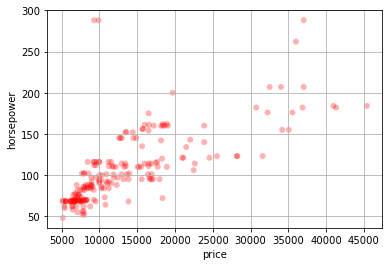

In [35]:
duration = data['price']
year = data['horsepower']
fig, ax = plt.subplots()
ax.scatter(duration, year, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('price')
plt.ylabel('horsepower')
plt.show()

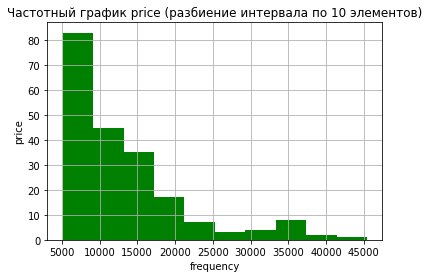

In [38]:
n, bins, patches = plt.hist(data['price'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('price')
plt.title('Частотный график price (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()


In [41]:
data["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [43]:
data["fuel-type"].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

## 3. Рассчитать и визуализировать корреляционную матрицу для переменных

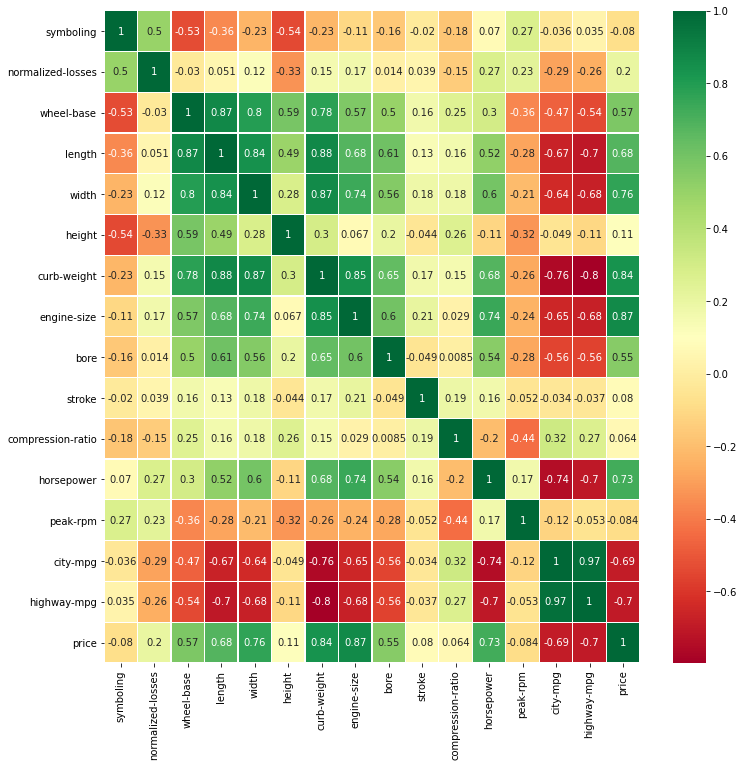

In [44]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

## 4.Визуализировать распределение переменной ‘Price’,рассчитать показатели skewness и kurtosis

C:\Users\karina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

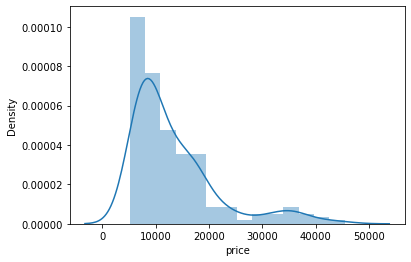

In [48]:
sns.distplot(data['price'])


C:\Users\karina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

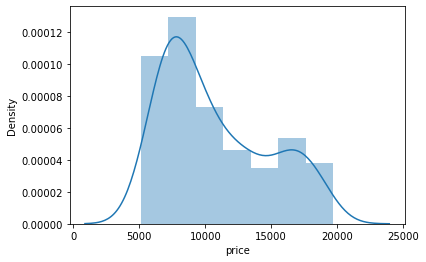

In [64]:
df = data.loc[data['price']<=20000]
sns.distplot(df['price'])


In [65]:
df[ df.price< 20000 ].head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [67]:
from scipy.stats import kurtosis, skew

print( 'kurtosis: {}'.format( kurtosis(df['price']) ))
print( 'skewness: {}'.format( skew(df['price']) ))


kurtosis: -0.8517120230509656
skewness: 0.6326373020794779


## 5. Визуализировать несколько взаимосвязей между переменными 

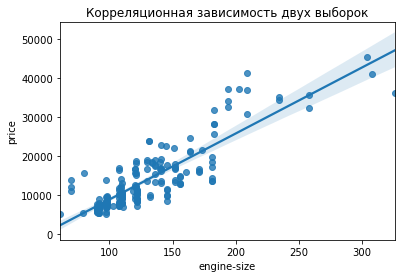

In [91]:
enginesize = data['engine-size']
price = data['price']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= enginesize, y=price, data=data, fit_reg=True)
plt.xlabel('engine-size')
plt.ylabel('price')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

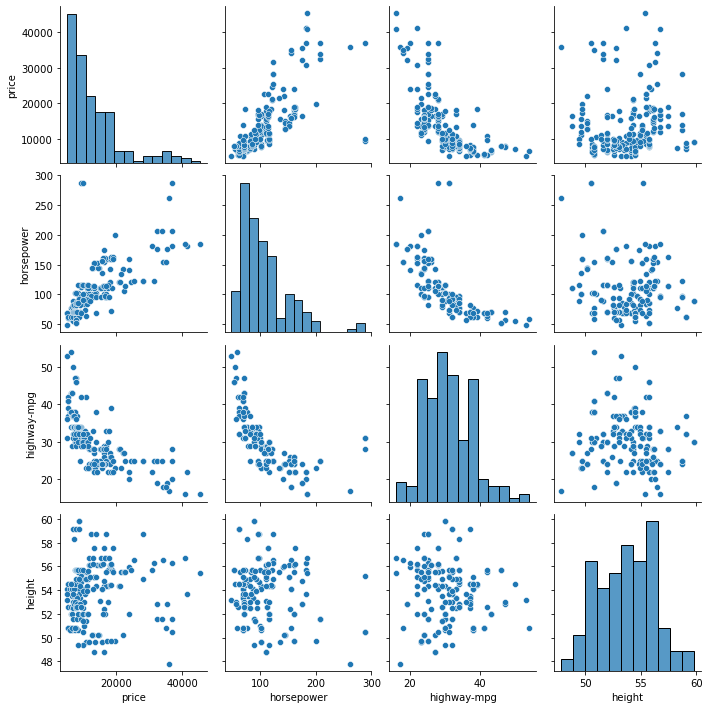

In [92]:
sns_plot = sns.pairplot(
    data[['price','horsepower','highway-mpg','height']])
sns_plot

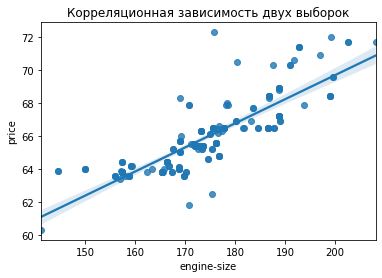

In [95]:
length = data['length']
width = data['width']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= length, y=width, data=data, fit_reg=True)
plt.xlabel('engine-size')
plt.ylabel('width')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

## 6.Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

### H0= Двигатели на бензине затрачиваются столько же,сколько и на дизеле

In [86]:
from scipy import stats 
small_1 = data[data['fuel-type']=='gas']['highway-mpg']
small_2 = data[data['fuel-type']=='diesel']['highway-mpg']
print(stats.ttest_ind(small_1, small_2))

Ttest_indResult(statistic=-2.7782750192973515, pvalue=0.005977403875730944)


Вывод: pvalue получился меньше стандартной альфа ошибки 0.05, из чего следует,что гипотеза неверная

C:\Users\karina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


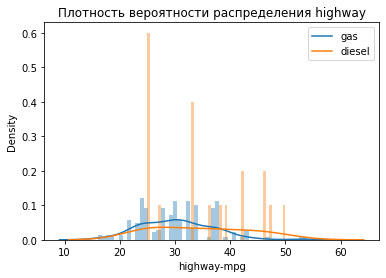

In [96]:
sns.distplot(small_1, 50)
sns.distplot(small_2, 50)
plt.title('Плотность вероятности распределения highway')
plt.legend(['gas','diesel'])
plt.show()

### H1= Машины с полным приводом затрачивают топливо также, как и с передним приводом 

In [110]:
from scipy import stats 
small_1 = data[data['drive-wheels']=='4wd']['highway-mpg']
small_2 = data[data['drive-wheels']=='rwd']['highway-mpg']
print(stats.ttest_ind(small_1, small_2))

Ttest_indResult(statistic=1.0297399146768202, pvalue=0.3061235590500212)


Вывод:Принимаем данную гипотезу, так как pvalue > 0.05 и можем сказать, что не имеется статистическое различие между машинами с полным приводом и передним.

C:\Users\karina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


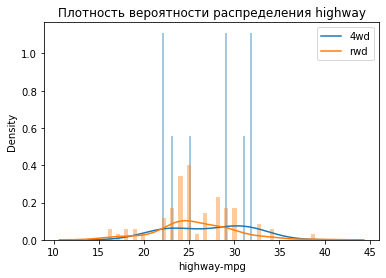

In [111]:
sns.distplot(small_1, 50)
sns.distplot(small_2, 50)
plt.title('Плотность вероятности распределения highway')
plt.legend(['4wd','rwd'])
plt.show()

### H2= Машины Porshe и Renault  стоят одинаково

In [112]:
from scipy import stats 
small_1 = data[data['make']=='porsche']['price']
small_2 = data[data['make']=='renault']['price']
print(stats.ttest_ind(small_1, small_2))

Ttest_indResult(statistic=4.948349197193482, pvalue=0.004291043678108383)


Вывод:Отвергаем гипотезу H2,имеется статистическое различие,  у машин цены отличаются(как и видим по таблице). 

C:\Users\karina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


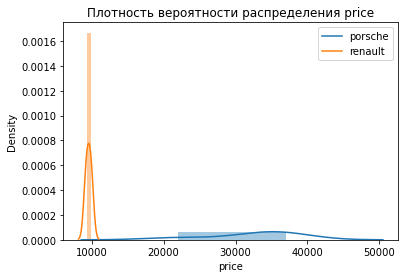

In [116]:
sns.distplot(small_1, 1)
sns.distplot(small_2, 1)
plt.title('Плотность вероятности распределения price')
plt.legend(['porsche','renault'])
plt.show()